In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

def print_metrics(y_true, y_pred, categories):
    print('Accuracy: ' + str(accuracy_score(y_true, y_pred)))
    draw_confusion_matrix(confusion_matrix(y_true, y_pred), categories)

def print_crossval_metrics(ys, categories):
    print('Accuracy: ' + str(np.mean([accuracy_score(y_true, y_pred) for y_true, y_pred in ys])))
    draw_confusion_matrix(sum([confusion_matrix(y_true, y_pred) for y_true, y_pred in ys]), categories)

def draw_confusion_matrix(cm, categories):
    # Draw confusion matrix
    fig = plt.figure(figsize=[3.2*pow(len(categories), 0.5), 2.4*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.colormaps['Blues'])
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=categories, yticklabels=categories, ylabel='Annotation', xlabel='Prediction')
    # Loop over data dimensions and create text annotations
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(16-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)

In [2]:
from sklearn.datasets import make_moons
import numpy as np
db = make_moons(n_samples=1000, noise=0.1, random_state=0)
X = db[0]
y = db[1]
print(X.shape)
print(y.shape)
print("Posibles clases: ", np.unique(y))

(1000, 2)
(1000,)
Posibles clases:  [0 1]


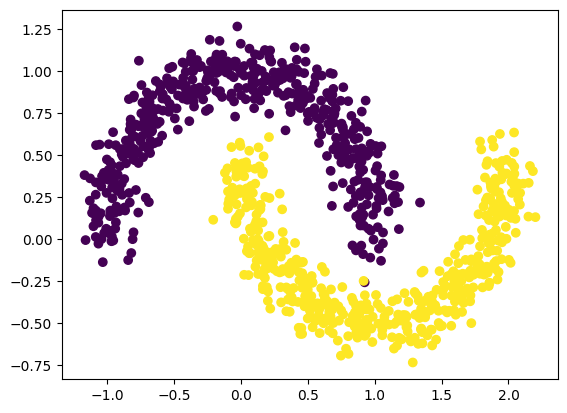

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### SVM Lineal

X_train:  (750, 2)
X_test:  (250, 2)
Mejor conjunto de parámetros:  {'C': 1}
Accuracy: 0.848


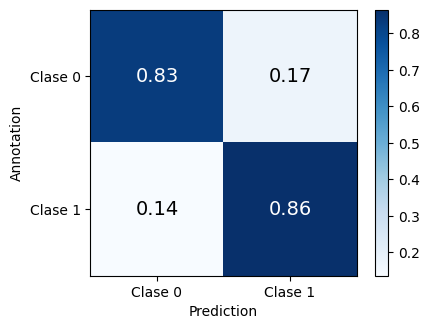

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = SVC(kernel='linear', random_state=0)

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

print("Mejor conjunto de parámetros: ", grid.best_params_)

best_params = grid.best_params_
best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)

print_metrics(y_test, y_pred, ['Clase 0', 'Clase 1'])

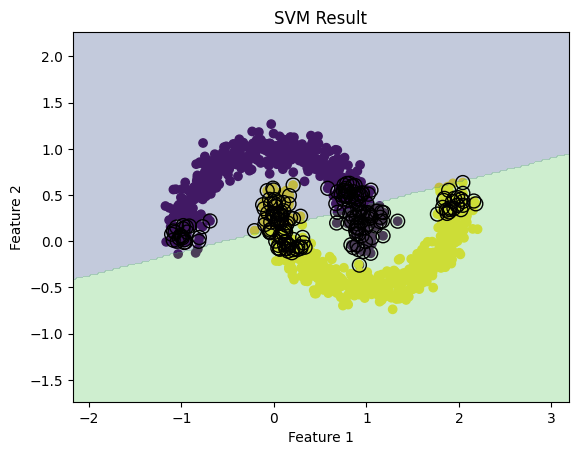

In [5]:
# Crea una malla para el gráfico
h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predice la clase para cada punto en la malla
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crea un scatter plot para las muestras de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

# Dibuja las regiones de decisión y los márgenes del SVM
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap='viridis')
plt.scatter(best_estimator.support_vectors_[:, 0], best_estimator.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Etiqueta los ejes y muestra el gráfico
plt.title('SVM Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

X_train:  (750, 2)
X_test:  (250, 2)
X_train:  (750, 2)
X_test:  (250, 2)
Mejor conjunto de parámetros:  {'C': 0.1}
Accuracy: 0.916


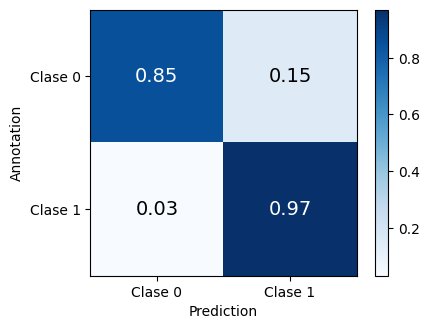

In [6]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = SVC(kernel='poly', random_state=0)

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

print("Mejor conjunto de parámetros: ", grid.best_params_)

best_params = grid.best_params_
best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)

print_metrics(y_test, y_pred, ['Clase 0', 'Clase 1'])

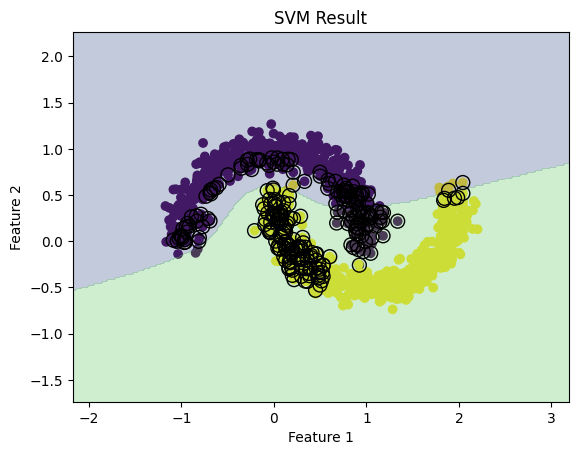

In [7]:
# Crea una malla para el gráfico
h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predice la clase para cada punto en la malla
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crea un scatter plot para las muestras de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

# Dibuja las regiones de decisión y los márgenes del SVM
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap='viridis')
plt.scatter(best_estimator.support_vectors_[:, 0], best_estimator.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Etiqueta los ejes y muestra el gráfico
plt.title('SVM Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

X_train:  (750, 2)
X_test:  (250, 2)
Mejor conjunto de parámetros:  {'C': 1}
Accuracy: 1.0


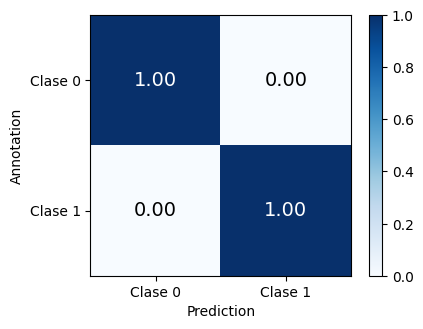

In [8]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = SVC(kernel='rbf', random_state=0)

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

print("Mejor conjunto de parámetros: ", grid.best_params_)

best_params = grid.best_params_
best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)

print_metrics(y_test, y_pred, ['Clase 0', 'Clase 1'])

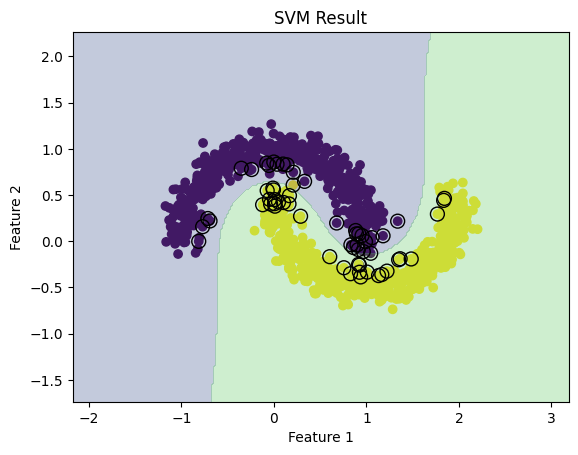

In [9]:
# Crea una malla para el gráfico
h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predice la clase para cada punto en la malla
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crea un scatter plot para las muestras de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

# Dibuja las regiones de decisión y los márgenes del SVM
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap='viridis')
plt.scatter(best_estimator.support_vectors_[:, 0], best_estimator.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Etiqueta los ejes y muestra el gráfico
plt.title('SVM Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()